In [1]:
import world
import agents
from ff import Solved
import ff

In [5]:
w = world.PDDLWorld('blocks-domain.pddl', 'pddl/blocks_problem_colour1.pddl')
agent = agents.CorrectingAgent(w)

Parsing domain blocks-domain.pddl
Parsing problem pddl/blocks_problem_colour1.pddl


In [3]:
def test_success(world):
    domain, problem = world.to_pddl()
    try:
        ff.run(domain, problem)
    except Solved:
        return True
    return False

In [4]:
test_success(w)

False

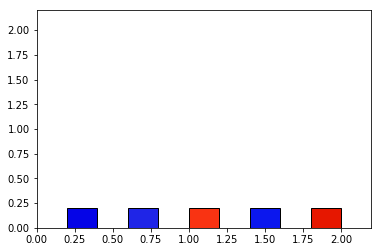

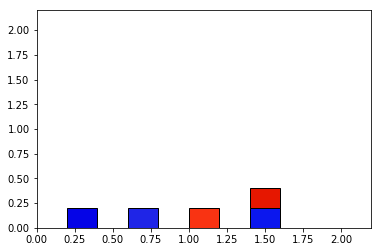

correction?


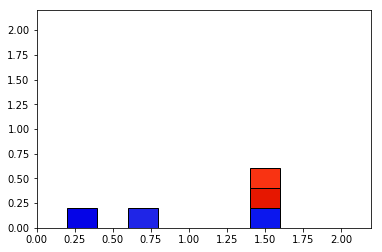

correction?no, put red blocks on blue blocks
(0.5, 0.5)
Is the top object red?yes


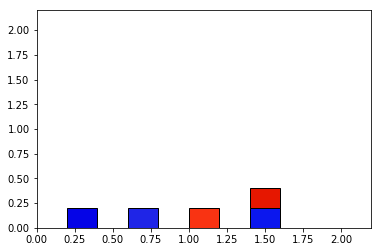

NoPlanError: No plan could be found

In [6]:
w.draw()
while not test_success(w):

    plan = agent.plan()
    for a, args in plan:
        w.update(a, args)
        w.draw()
        correction = input('correction?')
        if correction:
            agent.get_correction(correction, a, args)
            w.draw()
            break
        else:
            agent.no_correction(a, args)
            
print('DONE')    

In [ ]:
correction_type2 = 'No, now you cannot put b3 in the tower because you must put red blocks on blue blocks'

In [ ]:
o = w.sense()

In [ ]:
o.state[0].asPDDL()

In [ ]:
from pythonpddl2.pddl import Predicate, Formula, TypedArg, TypedArgList

In [ ]:
p = Predicate('green', TypedArgList([TypedArg('b1')]))

In [ ]:
Formula([p], op=None).asPDDL()

In [ ]:
for a, b in {}:
    print(a, b)

In [6]:
agent._print_goal()

(and (forall (?x) (in-tower ?x)) (forall (?y ?x) (or (not (yellow ?y)) (green ?x))))


In [8]:
agent.problem.goal.asPDDL()

'(and (forall (?x) (in-tower ?x)) (forall (?y ?x) (or (not (yellow ?y)) (green ?x))) (not (on b5 b4)))'

In [ ]:
import goal_updates

In [ ]:
goal_updates.create_default_goal().asPDDL()

In [6]:
agent._print_goal()

(and (forall (?x) (in-tower ?x)) (forall (?y ?x) (or (not (yellow ?y)) (green ?x))))


In [7]:
for s in agent.problem.initialstate:
    print(s.asPDDL())

(on-table b1)
(on-table b2)
(on-table b3)
(on-table b4)
(on-table b5)
(clear b1)
(clear b2)
(clear b3)
(clear b4)
(clear b5)
(arm-empty )
(in-tower b4)
(yellow b4)
